In [61]:
%matplotlib inline
from fredapi import Fred
fred = Fred(api_key='48602a9ca88b2b0eefabd0904eaeb6be')
#data = fred.get_series('SP500')
import pandas as pd
from pandas.tseries.offsets import *
pd.options.display.max_colwidth = 60
import numpy as np
import matplotlib.pyplot as plt
import urllib3
import urllib
from IPython.core.pylabtools import figsize
figsize(20, 5)
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import exp, expm1
import statsmodels.api as sm

C:\Users\syc\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(3, 3, 35594248432.504494)


C:\Users\syc\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


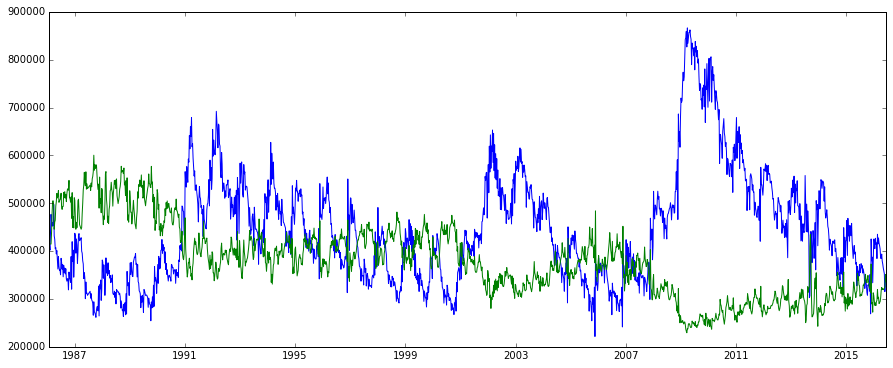

In [67]:
### Given P, Q, predictions_ARIMA by residual ###

series = fred.get_series('CACCLAIMS')
series = series[np.logical_not(np.isnan(series))]
#res = sm.tsa.ARMA(series, (3, 4)).fit()
#res_error = sum(res.resid.values**2)
#print(res_error)

def pred_ARIMA(p, q, series):
    ts_log = np.log(series)
    model = ARIMA(ts_log, order=(p, 1, q))  
    results_ARIMA = model.fit(disp = -1, method = 'css')  
    predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
    predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
    predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
    predictions_ARIMA = np.exp(predictions_ARIMA_log)
    return predictions_ARIMA


UpperLimit = 4
p = range(0, UpperLimit + 1)
q = range(0, UpperLimit + 1)

def opt_paras(series):
   
    res = sm.tsa.ARMA(series, (0, 0)).fit()
    res_error = sum(res.resid.values**2)
    opt_p = 0
    opt_q = 0
    
    for i in range(0, UpperLimit):
        for j in range(0, UpperLimit):
            #if i==0 and j==0:
            #    continue
            res = sm.tsa.ARMA(series, (p[i], q[j])).fit()            
            new_res_error = sum(res.resid.values**2) 
            if (new_res_error < res_error):
                res_error = new_res_error
                opt_p = p[i]
                opt_q = q[j]
                   
    series_pred = pred_ARIMA(opt_p, opt_q, series)
    return opt_p, opt_q, mean_squared_error(series, series_pred)               

result = opt_paras(series)
print(result) 
plt.plot(series)
plt.plot(pred_ARIMA(result[0], result[1], series), color='green')



In [55]:
### Given P, Q, predictions_ARIMA by MSE ###

series = fred.get_series('HDTGPDITQ163N')
series = series[np.logical_not(np.isnan(series))]

def pred_ARIMA(p, q, series):
    ts_log = np.log(series)
    model = ARIMA(ts_log, order=(p, 1, q))  
    results_ARIMA = model.fit(disp = -1)  
    predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
    predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
    predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
    predictions_ARIMA = np.exp(predictions_ARIMA_log)
    return predictions_ARIMA
'''
p = 3
q = 2
plt.plot(series)
plt.plot(pred_ARIMA(p, q, series), color='green')
print(mean_squared_error(series, pred_ARIMA(p, q, series)))
'''
UpperLimit = 2
p = range(0, UpperLimit + 1)
q = range(0, UpperLimit + 1)

def opt_paras(series):
    Min_MSE = mean_squared_error(series, pred_ARIMA(0, 0, series))
    opt_p = 0
    opt_q = 0
    for i in range(0, UpperLimit + 1):
        for j in range(0, UpperLimit + 1):
            #new_MSE = sum((series - pred_ARIMA(p[i], q[j], series))**2)
            new_MSE = mean_squared_error(series, pred_ARIMA(p[i], q[j], series))  
            if (new_MSE < Min_MSE):
                Min_MSE = new_MSE
                opt_p = p[i]
                opt_q = q[j]
                   
    series_pred = pred_ARIMA(opt_p, opt_q, series)
    return opt_p, opt_q, mean_squared_error(series, series_pred)               

result = opt_paras(series)
print(result) 
plt.plot(series)
plt.plot(pred_ARIMA(result[0], result[1], series), color='green')
#'''

LinAlgError: Singular matrix

In [24]:
UpperLimit = 8
p = range(0, UpperLimit + 1)
q = range(0, UpperLimit + 1)
print(p[8], q[8], p[4])

8 8 4


In [78]:
### Optimization to get best P, Q###
UpperLimit = 3
p = range(0, UpperLimit + 1)
q = range(0, UpperLimit + 1)

series = fred.get_series('DEUCPIALLMINMEI')

def opt_paras(series):
    Min_MSE = mean_squared_error(series, pred_ARIMA(1, 1, series))
    opt_p = 1
    opt_q = 1
    for i in range(0, UpperLimit + 1):
        for j in range(0, UpperLimit + 1):
            new_MSE = sum((series - pred_ARIMA(p[i], q[j], series))**2)
            if (new_MSE < Min_MSE):
                Min_MSE = new_MSE
                opt_p = p[i]
                opt_q = q[j]
                   
    series_pred = pred_ARIMA(opt_p, opt_q, series)
    return opt_p, opt_q, mean_squared_error(series, series_pred)               
                    
print(opt_paras(series)) 
plt.plot(series)
plt.plot(pred_ARIMA(opt_p, opt_q, series), color='green')

C:\Users\syc\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\syc\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\syc\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\syc\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\syc\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retva

LinAlgError: SVD did not converge

In [ ]:
### Based on P, Q to predict plot###
### Based on P, Q to get prediction value ###

In [27]:
y = fred.get_series('INTGSBDEM193N')
print(y)

1957-01-01    7.287833
1957-02-01    7.387667
1957-03-01    7.487500
1957-04-01    7.387667
1957-05-01    7.387667
1957-06-01    7.387667
1957-07-01    7.487500
1957-08-01    7.587333
1957-09-01    7.587333
1957-10-01    7.687167
1957-11-01    7.687167
1957-12-01    7.687167
1958-01-01    7.687167
1958-02-01    7.487500
1958-03-01    7.387667
1958-04-01    7.387667
1958-05-01    7.287833
1958-06-01    7.088167
1958-07-01    6.688833
1958-08-01    6.489167
1958-09-01    6.189667
1958-10-01    5.990000
1958-11-01    5.890167
1958-12-01    5.890167
1959-01-01    5.790333
1959-02-01    5.590667
1959-03-01    5.590667
1959-04-01    5.590667
1959-05-01    5.690500
1959-06-01    5.690500
                ...   
2013-12-01    1.800000
2014-01-01    1.760000
2014-02-01    1.560000
2014-03-01    1.510000
2014-04-01    1.460000
2014-05-01    1.330000
2014-06-01    1.260000
2014-07-01    1.110000
2014-08-01    0.950000
2014-09-01    0.920000
2014-10-01    0.790000
2014-11-01    0.720000
2014-12-01 

'\np – The lag value where the PACF chart crosses the upper confidence interval for the first time. \nIf you notice closely, in this case p=2.\nq – The lag value where the ACF chart crosses the upper confidence interval for the first time. \nIf you notice closely, in this case q=3.\n'

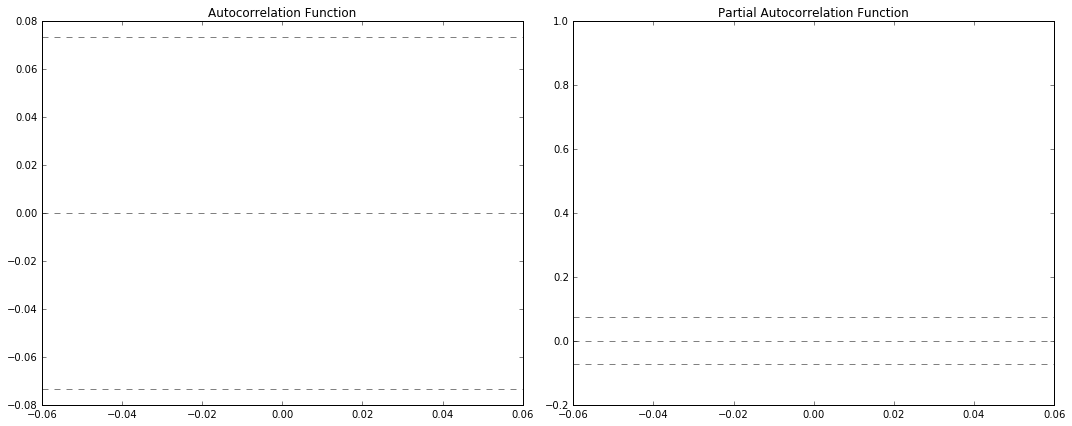

In [41]:
### Determine model order ### fred.get_series('DEUCPIALLMINMEI')
from statsmodels.tsa.stattools import acf, pacf
ts = fred.get_series('INTGSBDEM193N')
ts_log = np.log(ts)
ts_log_diff = ts_log - ts_log.shift()

lag_acf = acf(ts_log_diff, nlags=25)
lag_pacf = pacf(ts_log_diff, nlags=25)
#print(ts_log_diff)

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

'''
p – The lag value where the PACF chart crosses the upper confidence interval for the first time. 
If you notice closely, in this case p=2.
q – The lag value where the ACF chart crosses the upper confidence interval for the first time. 
If you notice closely, in this case q=3.
'''



In [40]:
y = fred.get_series('DEUCPIALLMINMEI')
dta = y 
dta.index = pd.DatetimeIndex(start='1955-01', end='2015-04', freq='M')
print(dta.index)
res = sm.tsa.ARMA(dta, (4, 5)).fit()
fig, ax = plt.subplots()
ax = dta.ix['1957-01-31':].plot(ax=ax)
fig = res.plot_predict('2014-01-31', '2018-12-31', dynamic=True, ax=ax, plot_insample=False)
plt.show()

DatetimeIndex(['1955-01-31', '1955-02-28', '1955-03-31', '1955-04-30',
               '1955-05-31', '1955-06-30', '1955-07-31', '1955-08-31',
               '1955-09-30', '1955-10-31',
               ...
               '2014-06-30', '2014-07-31', '2014-08-31', '2014-09-30',
               '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31',
               '2015-02-28', '2015-03-31'],
              dtype='datetime64[ns]', length=723, freq='M')


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

C:\Users\syc\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


3950.76369898


C:\Users\syc\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


LinAlgError: Singular matrix

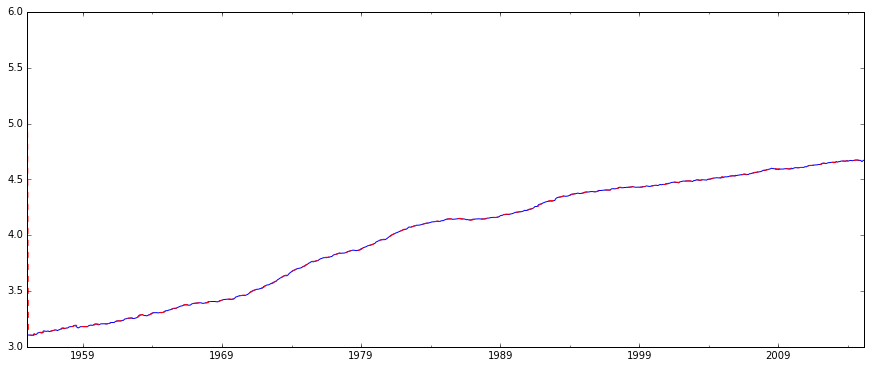

In [52]:
y = fred.get_series('DEUCPIALLMINMEI')
ts_data = y
ts_log_data = np.log(ts_data)
ts_log_data.plot(style='b-', label='actual')

# in-sample fit
# ===================================

model = sm.tsa.ARMA(ts_log_data, order=(4,3)).fit()
#print(model.params)

y_pred = model.predict(ts_log_data.index[0].isoformat(), ts_log_data.index[-1].isoformat())
y_pred.plot(style='r--', label='in-sample fit')

y_resid = model.resid

print(mean_squared_error(ts_data, y_pred))

# optimization for p and q 
# ===================================

UpperLimit = 2
p = range(1, UpperLimit + 1)
q = range(1, UpperLimit + 1)

def opt_paras(series):
   
    model = sm.tsa.ARMA(ts_log_data, order=(0, 0)).fit()
    y_pred = model.predict(ts_log_data.index[0].isoformat(), ts_log_data.index[-1].isoformat())
    min_MSE = mean_squared_error(series, y_pred)
    opt_p = 0
    opt_q = 0
    
    for i in range(0, UpperLimit):
        for j in range(0, UpperLimit):
            model = sm.tsa.ARMA(ts_log_data, order=(p[i], q[j])).fit()
            y_pred = model.predict(ts_log_data.index[0].isoformat(), ts_log_data.index[-1].isoformat())
            new_MSE = mean_squared_error(series, y_pred)
            if (new_MSE < min_MSE):
                min_MSE = new_MSE
                opt_p = p[i]
                opt_q = q[j]
                
    model = sm.tsa.ARMA(ts_log_data, order=(opt_p, opt_q)).fit()               
    series_pred = model.predict(ts_log_data.index[0].isoformat(), ts_log_data.index[-1].isoformat())
    return opt_p, opt_q, mean_squared_error(series, series_pred)               

opt_result = opt_paras(ts_data)

# out-sample predict
# ===================================
from statsmodels.tsa.arima_model import _arma_predict_out_of_sample

res = sm.tsa.ARMA(ts_log_data, order=(opt_result[0], opt_result[1])).fit() 

# get what you need for predicting one-step ahead
params = res.params
residuals = res.resid
p = res.k_ar
q = res.k_ma
k_exog = res.k_exog
k_trend = res.k_trend
steps = 5
print(p, q)
_arma_predict_out_of_sample(params, steps, residuals, p, q, k_trend, k_exog, endog=y, exog=None, start=len(y))